Dataset Info:
Training data shape: (70, 4)
Training labels shape: (70, 1)
Test data shape: (30, 4)
Test labels shape: (30, 1)

Training Neural Network...
Epoch 0/1000, Cost: 0.7410, Accuracy: 0.4714
Epoch 100/1000, Cost: 0.2042, Accuracy: 1.0000
Epoch 200/1000, Cost: 0.0846, Accuracy: 1.0000
Epoch 300/1000, Cost: 0.0484, Accuracy: 1.0000
Epoch 400/1000, Cost: 0.0328, Accuracy: 1.0000
Epoch 500/1000, Cost: 0.0244, Accuracy: 1.0000
Epoch 300/1000, Cost: 0.0484, Accuracy: 1.0000
Epoch 400/1000, Cost: 0.0328, Accuracy: 1.0000
Epoch 500/1000, Cost: 0.0244, Accuracy: 1.0000
Epoch 600/1000, Cost: 0.0193, Accuracy: 1.0000
Epoch 700/1000, Cost: 0.0159, Accuracy: 1.0000
Epoch 800/1000, Cost: 0.0135, Accuracy: 1.0000
Epoch 600/1000, Cost: 0.0193, Accuracy: 1.0000
Epoch 700/1000, Cost: 0.0159, Accuracy: 1.0000
Epoch 800/1000, Cost: 0.0135, Accuracy: 1.0000
Epoch 900/1000, Cost: 0.0117, Accuracy: 1.0000

Final Results:
Training Accuracy: 1.0000
Test Accuracy: 1.0000
Epoch 900/1000, Cost: 0.0117, Ac

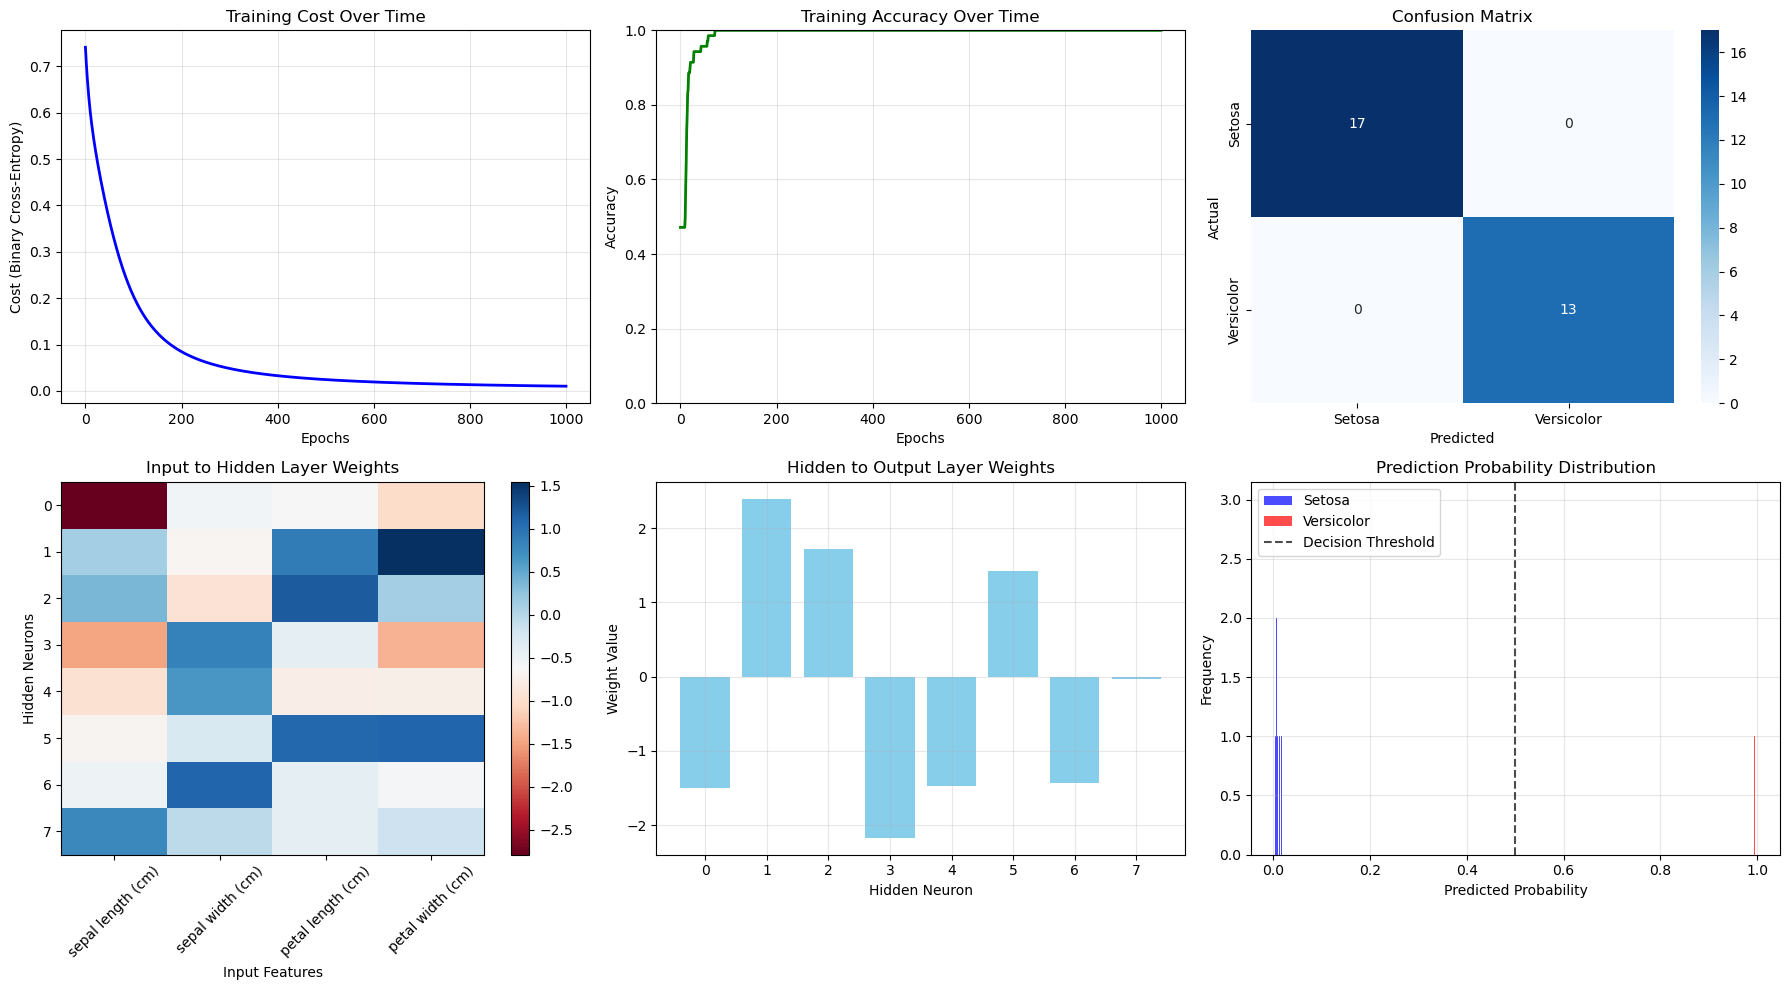


NEURAL NETWORK ANALYSIS
Architecture: 4 → 8 → 1
Total Parameters: 49
Final Training Cost: 0.010277
Training Accuracy: 1.0000
Test Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        17
  Versicolor       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Sample Predictions:
--------------------------------------------------
Sample 1: Actual=Versicolor, Predicted=Versicolor, Probability=0.998
Sample 2: Actual=Versicolor, Predicted=Versicolor, Probability=0.995
Sample 3: Actual=Versicolor, Predicted=Versicolor, Probability=0.996
Sample 4: Actual=Setosa, Predicted=Setosa, Probability=0.013
Sample 5: Actual=Setosa, Predicted=Setosa, Probability=0.008
Sample 6: Actual=Setosa, Predicted=Setosa, Probability=0.008
Sample 7: Actual=Setosa, Predicted=Seto

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Sigmoid activation function
def sigmoid(x):
    # Clip x to prevent overflow
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid (used in backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)

# Cost function (binary cross-entropy) with numerical stability
def compute_cost(y, y_pred):
    # Add small epsilon to prevent log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    m = len(y)
    cost = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

# Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases with proper scaling
        self.weights1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0/input_size)
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0/hidden_size)
        self.bias2 = np.zeros((1, output_size))
        
    def feedforward(self, X):
        # Hidden layer
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = sigmoid(self.z1)
        
        # Output layer
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = sigmoid(self.z2)
        return self.a2
    
    def backpropagate(self, X, y, learning_rate):
        m = len(y)
        
        # Output layer gradients
        dz2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        # Hidden layer gradients
        dz1 = np.dot(dz2, self.weights2.T) * sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        # Update weights and biases
        self.weights1 -= learning_rate * dW1
        self.bias1 -= learning_rate * db1
        self.weights2 -= learning_rate * dW2
        self.bias2 -= learning_rate * db2

    def train(self, X, y, epochs, learning_rate):
        cost_history = []
        accuracy_history = []
        
        for epoch in range(epochs):
            # Feedforward
            y_pred = self.feedforward(X)
            
            # Compute cost
            cost = compute_cost(y, y_pred)
            cost_history.append(cost)
            
            # Compute accuracy
            y_pred_class = (y_pred >= 0.5).astype(int)
            accuracy = accuracy_score(y, y_pred_class)
            accuracy_history.append(accuracy)
            
            # Backpropagate
            self.backpropagate(X, y, learning_rate)
            
            # Print progress every 100 epochs
            if epoch % 100 == 0:
                print(f"Epoch {epoch}/{epochs}, Cost: {cost:.4f}, Accuracy: {accuracy:.4f}")
        
        return cost_history, accuracy_history

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# For binary classification, use classes 0 and 1
X_binary = X[y != 2]
y_binary = y[y != 2]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape labels for neural network (important!)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print("Dataset Info:")
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test_scaled.shape}")
print(f"Test labels shape: {y_test.shape}")

# Initialize neural network
input_size = X_train_scaled.shape[1]  # 4 features
hidden_size = 8  # Increased hidden units
output_size = 1  # Binary output

nn = NeuralNetwork(input_size, hidden_size, output_size)

# Train the model
epochs = 1000
learning_rate = 0.1
print("\nTraining Neural Network...")
cost_history, accuracy_history = nn.train(X_train_scaled, y_train, epochs, learning_rate)

# Test the model
y_pred = nn.feedforward(X_test_scaled)
y_pred_class = (y_pred >= 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred_class)

print(f"\nFinal Results:")
print(f"Training Accuracy: {accuracy_history[-1]:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Cost function over epochs
axes[0, 0].plot(cost_history, 'b-', linewidth=2)
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Cost (Binary Cross-Entropy)')
axes[0, 0].set_title('Training Cost Over Time')
axes[0, 0].grid(True, alpha=0.3)

# 2. Accuracy over epochs
axes[0, 1].plot(accuracy_history, 'g-', linewidth=2)
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_title('Training Accuracy Over Time')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_ylim([0, 1])

# 3. Confusion Matrix
cm = confusion_matrix(y_test.flatten(), y_pred_class.flatten())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 2],
            xticklabels=['Setosa', 'Versicolor'],
            yticklabels=['Setosa', 'Versicolor'])
axes[0, 2].set_title('Confusion Matrix')
axes[0, 2].set_xlabel('Predicted')
axes[0, 2].set_ylabel('Actual')

# 4. Feature weights visualization (Input to Hidden layer)
im1 = axes[1, 0].imshow(nn.weights1.T, cmap='RdBu', aspect='auto')
axes[1, 0].set_title('Input to Hidden Layer Weights')
axes[1, 0].set_xlabel('Input Features')
axes[1, 0].set_ylabel('Hidden Neurons')
axes[1, 0].set_xticks(range(len(data.feature_names)))
axes[1, 0].set_xticklabels(data.feature_names, rotation=45)
plt.colorbar(im1, ax=axes[1, 0])

# 5. Hidden layer weights (Hidden to Output)
axes[1, 1].bar(range(hidden_size), nn.weights2.flatten(), color='skyblue')
axes[1, 1].set_title('Hidden to Output Layer Weights')
axes[1, 1].set_xlabel('Hidden Neuron')
axes[1, 1].set_ylabel('Weight Value')
axes[1, 1].grid(True, alpha=0.3)

# 6. Prediction probabilities distribution
y_prob_flat = y_pred.flatten()
axes[1, 2].hist(y_prob_flat[y_test.flatten() == 0], alpha=0.7, label='Setosa', bins=20, color='blue')
axes[1, 2].hist(y_prob_flat[y_test.flatten() == 1], alpha=0.7, label='Versicolor', bins=20, color='red')
axes[1, 2].axvline(x=0.5, color='black', linestyle='--', alpha=0.7, label='Decision Threshold')
axes[1, 2].set_xlabel('Predicted Probability')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Prediction Probability Distribution')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed analysis
print("\n" + "="*60)
print("NEURAL NETWORK ANALYSIS")
print("="*60)
print(f"Architecture: {input_size} → {hidden_size} → {output_size}")
print(f"Total Parameters: {input_size*hidden_size + hidden_size + hidden_size*output_size + output_size}")
print(f"Final Training Cost: {cost_history[-1]:.6f}")
print(f"Training Accuracy: {accuracy_history[-1]:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test.flatten(), y_pred_class.flatten(), 
                          target_names=['Setosa', 'Versicolor']))

# Show some predictions
print("\nSample Predictions:")
print("-" * 50)
for i in range(min(10, len(X_test))):
    prob = y_pred[i, 0]
    pred = y_pred_class[i, 0]
    actual = y_test[i, 0]
    class_names = ['Setosa', 'Versicolor']
    print(f"Sample {i+1}: Actual={class_names[actual]}, "
          f"Predicted={class_names[pred]}, Probability={prob:.3f}")